In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob
import string
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,KFold
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from ipywidgets import interact,interact_manual
plt.figure(figsize=(18,5))
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")

<Figure size 1296x360 with 0 Axes>

In [2]:
data=pd.read_csv("amazon_alexa.tsv",delimiter="\t",parse_dates=[1])
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1


In [8]:
data.describe().style.background_gradient(cmap="Oranges")

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [9]:
data.shape

(3150, 5)

In [10]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

## 1 Simple Data Cleaning 

In [18]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [19]:
def get_sents(sent):
  lowers=[]
  for i in nltk.tokenize.word_tokenize(sent):
    lowers.append(i.lower())
  lowers=' '.join(lowers)
  punctuation_filtered=[]
  for i in lowers:
    if i not in string.punctuation:
      punctuation_filtered.append(i)
  punctuation_filtered=''.join(punctuation_filtered)
  punc_stopword_filter=[]
  for i in nltk.tokenize.word_tokenize(punctuation_filtered):
    if i not in nltk.corpus.stopwords.words('english'):
      punc_stopword_filter.append(i)
  punc_stopword_filter=' '.join(punc_stopword_filter)
  punc_stopword_lemmatize_filter=[]
  for i in nltk.tokenize.word_tokenize(punc_stopword_filter):
    punc_stopword_lemmatize_filter.append(nltk.stem.wordnet.WordNetLemmatizer().lemmatize(i))
  punc_stopword_lemmatize_filter=' '.join(punc_stopword_lemmatize_filter)
  return punc_stopword_lemmatize_filter
%time data["verified_reviews"]=data["verified_reviews"].apply(get_sents)

CPU times: user 12.9 s, sys: 1.15 s, total: 14 s
Wall time: 14.7 s


In [20]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,love echo,1
1,5,2018-07-31,Charcoal Fabric,loved,1
2,4,2018-07-31,Walnut Finish,sometimes playing game answer question correct...,1
3,5,2018-07-31,Charcoal Fabric,lot fun thing 4 yr old learns dinosaur control...,1
4,5,2018-07-31,Charcoal Fabric,music,1


# 2 Data Cleaning (List comprehension concepts) 

In [21]:
data=pd.read_csv("amazon_alexa.tsv",delimiter="\t",parse_dates=[1])
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1


In [22]:
def get_sents(sent):
  sent_lower=' '.join([ i.lower() for i in nltk.tokenize.word_tokenize(sent)])
  sent_lower_punct_filter=''.join([i for i in sent_lower if i not in string.punctuation]) 
  sent_lower_punct_stopword_filter=' '.join( [ i for i in nltk.tokenize.word_tokenize(sent_lower_punct_filter) if i not in nltk.corpus.stopwords.words('english')])
  sent_lower_punct_stopword_lemmatize_filter=' '.join([nltk.stem.wordnet.WordNetLemmatizer().lemmatize(i) for i in nltk.tokenize.word_tokenize(sent_lower_punct_stopword_filter)])
  return sent_lower_punct_stopword_filter
%time data["verified_reviews"]=data["verified_reviews"].apply(get_sents)

CPU times: user 11 s, sys: 1.16 s, total: 12.2 s
Wall time: 12.2 s


In [23]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,love echo,1
1,5,2018-07-31,Charcoal Fabric,loved,1
2,4,2018-07-31,Walnut Finish,sometimes playing game answer question correct...,1
3,5,2018-07-31,Charcoal Fabric,lot fun thing 4 yr old learns dinosaurs contro...,1
4,5,2018-07-31,Charcoal Fabric,music,1


## 3 Data Cleaning (One Line code)

In [24]:
data=pd.read_csv("amazon_alexa.tsv",delimiter="\t",parse_dates=[1])
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1


In [25]:
def get_sents(sent):
  return ' '.join([nltk.stem.wordnet.WordNetLemmatizer().lemmatize(i) for i in nltk.tokenize.word_tokenize(' '.join( [ i for i in nltk.tokenize.word_tokenize(''.join([i for i in ' '.join([ i.lower() for i in nltk.tokenize.word_tokenize(sent)]) if i not in string.punctuation])) if i not in nltk.corpus.stopwords.words('english')]))])
%time data["verified_reviews"]=data["verified_reviews"].apply(get_sents)

CPU times: user 11.2 s, sys: 1.01 s, total: 12.2 s
Wall time: 13.7 s


In [26]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,love echo,1
1,5,2018-07-31,Charcoal Fabric,loved,1
2,4,2018-07-31,Walnut Finish,sometimes playing game answer question correct...,1
3,5,2018-07-31,Charcoal Fabric,lot fun thing 4 yr old learns dinosaur control...,1
4,5,2018-07-31,Charcoal Fabric,music,1


# Data Cleaning way 4  

In [27]:
data=pd.read_csv("amazon_alexa.tsv",delimiter="\t",parse_dates=[1])
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1
1,5,2018-07-31,Charcoal Fabric,Loved it!,1
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,2018-07-31,Charcoal Fabric,Music,1


In [28]:
def get_sents(sent):
  return ' '.join([nltk.stem.wordnet.WordNetLemmatizer().lemmatize(i) for i in nltk.tokenize.word_tokenize(' '.
                        join( [ i for i in nltk.tokenize.word_tokenize(''.join([i for i in ' '.join([ i.
                        lower() for i in nltk.tokenize.word_tokenize(sent)]) if i not in string.
                        punctuation])) if i not in nltk.corpus.stopwords.words('english')]))])
%time data["verified_reviews"]=data["verified_reviews"].apply(get_sents)

CPU times: user 11.3 s, sys: 1.11 s, total: 12.4 s
Wall time: 13.8 s


In [29]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,2018-07-31,Charcoal Fabric,love echo,1
1,5,2018-07-31,Charcoal Fabric,loved,1
2,4,2018-07-31,Walnut Finish,sometimes playing game answer question correct...,1
3,5,2018-07-31,Charcoal Fabric,lot fun thing 4 yr old learns dinosaur control...,1
4,5,2018-07-31,Charcoal Fabric,music,1


## Feature Engeenering on Text Data & Sentiment Feature Extraction

In [30]:
data["review_words"]=data["verified_reviews"].apply(lambda x: len(nltk.tokenize.word_tokenize(x)) )
# second way : data["review_words"]=data["verified_reviews"].apply(lambda x: len(x.split(" ")))
data["review_char"]=data["verified_reviews"].apply(lambda x: len(''.join(nltk.tokenize.word_tokenize(x))))

In [31]:
data.tail()

,rating,date,variation,verified_reviews,feedback,review_words,review_char
3145,5,2018-07-30,Black Dot,perfect kid adult everyone,1,4,23
3146,5,2018-07-30,Black Dot,listening music searching location checking ti...,1,13,79
3147,5,2018-07-30,Black Dot,love thing running entire home tv light thermo...,1,42,215
3148,5,2018-07-30,White Dot,complaint sound quality nt great mostly use co...,1,35,176
3149,4,2018-07-29,Black Dot,good,1,1,4


In [32]:
def get_sentiment(sent,check):
  return (TextBlob(sent).sentiment.polarity if check=="polarity" else TextBlob(sent).sentiment.subjectivity)
%time data["polarity"]=data["verified_reviews"].apply(lambda x: get_sentiment(x,"polarity"))
%time data["subjectivity"]=data["verified_reviews"].apply(lambda x: get_sentiment(x,"subjectivity"))

CPU times: user 724 ms, sys: 5.86 ms, total: 729 ms
Wall time: 735 ms
CPU times: user 686 ms, sys: 3.8 ms, total: 689 ms
Wall time: 694 ms


In [33]:
data.head()

,rating,date,variation,verified_reviews,feedback,review_words,review_char,polarity,subjectivity
0,5,2018-07-31,Charcoal Fabric,love echo,1,2,8,0.500000,0.600000
1,5,2018-07-31,Charcoal Fabric,loved,1,1,5,0.700000,0.800000
2,4,2018-07-31,Walnut Finish,sometimes playing game answer question correct...,1,17,90,0.000000,0.656250
3,5,2018-07-31,Charcoal Fabric,lot fun thing 4 yr old learns dinosaur control...,1,19,88,0.233333,0.483333
4,5,2018-07-31,Charcoal Fabric,music,1,1,5,0.000000,0.000000


In [34]:
data["lexical_density"]=data["verified_reviews"].apply(lambda x: (len(set(nltk.tokenize.word_tokenize(x))))/(len((nltk.
                                                                                             tokenize.word_tokenize(x)))+1))
                                                                  

In [35]:
data.head()

,rating,date,variation,verified_reviews,feedback,review_words,review_char,polarity,subjectivity,lexical_density
0,5,2018-07-31,Charcoal Fabric,love echo,1,2,8,0.500000,0.600000,0.666667
1,5,2018-07-31,Charcoal Fabric,loved,1,1,5,0.700000,0.800000,0.500000
2,4,2018-07-31,Walnut Finish,sometimes playing game answer question correct...,1,17,90,0.000000,0.656250,0.888889
3,5,2018-07-31,Charcoal Fabric,lot fun thing 4 yr old learns dinosaur control...,1,19,88,0.233333,0.483333,0.950000
4,5,2018-07-31,Charcoal Fabric,music,1,1,5,0.000000,0.000000,0.500000


In [36]:
data[["polarity","subjectivity","lexical_density"]]=data[["polarity","subjectivity",
                                                   "lexical_density"]].apply(lambda x:x.apply(lambda z: np.round(z,2)))

In [37]:
data.head(2)

,rating,date,variation,verified_reviews,feedback,review_words,review_char,polarity,subjectivity,lexical_density
0,5,2018-07-31,Charcoal Fabric,love echo,1,2,8,0.5,0.6,0.67
1,5,2018-07-31,Charcoal Fabric,loved,1,1,5,0.7,0.8,0.50


## Make insights from data

In [38]:
@interact
def insights(variation=data["variation"].unique(),feedback=[0,1]):
  return data[(data["variation"]==variation) & (data["feedback"]==feedback)][data.drop(columns=["date",
                      "feedback","variation","rating"]).columns].sort_values(by="review_words",
                                                        ascending=False).head(8).style.background_gradient(cmap="hot")

interactive(children=(Dropdown(description='variation', options=('Charcoal Fabric ', 'Walnut Finish ', 'Heathe…

## Combine all reviews on the basis of variation
And find Most commented variation

In [39]:
df=data[data["variation"].duplicated(keep=False)]
combine=df.groupby("variation")["verified_reviews"].transform(lambda x: ';'.join(x))

In [40]:
df["combine"]=combine
df.head()

,rating,date,variation,verified_reviews,feedback,review_words,review_char,polarity,subjectivity,lexical_density,combine
0,5,2018-07-31,Charcoal Fabric,love echo,1,2,8,0.50,0.60,0.67,love echo;loved;lot fun thing 4 yr old learns ...
1,5,2018-07-31,Charcoal Fabric,loved,1,1,5,0.70,0.80,0.50,love echo;loved;lot fun thing 4 yr old learns ...
2,4,2018-07-31,Walnut Finish,sometimes playing game answer question correct...,1,17,90,0.00,0.66,0.89,sometimes playing game answer question correct...
3,5,2018-07-31,Charcoal Fabric,lot fun thing 4 yr old learns dinosaur control...,1,19,88,0.23,0.48,0.95,love echo;loved;lot fun thing 4 yr old learns ...
4,5,2018-07-31,Charcoal Fabric,music,1,1,5,0.00,0.00,0.50,love echo;loved;lot fun thing 4 yr old learns ...


In [41]:
df=df.drop_duplicates(subset=["variation"])

In [42]:
df.shape

(16, 11)

Total comments on each variation

In [43]:
df["count"]=df["combine"].apply(lambda x: len(x.split(";")))
df.head()

,rating,date,variation,verified_reviews,feedback,review_words,review_char,polarity,subjectivity,lexical_density,combine,count
0,5,2018-07-31,Charcoal Fabric,love echo,1,2,8,0.50,0.60,0.67,love echo;loved;lot fun thing 4 yr old learns ...,430
2,4,2018-07-31,Walnut Finish,sometimes playing game answer question correct...,1,17,90,0.00,0.66,0.89,sometimes playing game answer question correct...,9
5,5,2018-07-31,Heather Gray Fabric,received echo gift needed another bluetooth so...,1,18,101,0.29,0.51,0.95,received echo gift needed another bluetooth so...,157
6,3,2018-07-31,Sandstone Fabric,without cellphone use many feature ipad see us...,1,33,164,0.22,0.49,0.88,without cellphone use many feature ipad see us...,90
12,5,2018-07-30,Oak Finish,purchased mother knee problem give something t...,1,22,117,0.00,0.40,0.96,purchased mother knee problem give something t...,14


In [44]:
df.drop(columns=["verified_reviews"],inplace=True)

In [45]:
df.head(2)

,rating,date,variation,feedback,review_words,review_char,polarity,subjectivity,lexical_density,combine,count
0,5,2018-07-31,Charcoal Fabric,1,2,8,0.5,0.60,0.67,love echo;loved;lot fun thing 4 yr old learns ...,430
2,4,2018-07-31,Walnut Finish,1,17,90,0.0,0.66,0.89,sometimes playing game answer question correct...,9


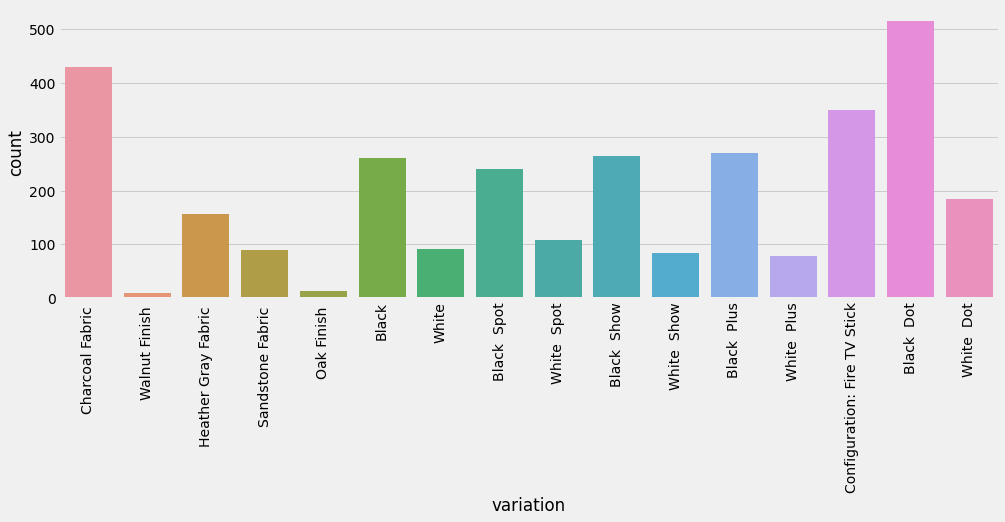

In [46]:
plt.rcParams["figure.figsize"]=(15,5)
sns.barplot(df["variation"],df["count"])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
@interact
def get(variation=data["variation"].unique(),polarity=0.5):
  return data[(data["variation"]==variation) & (data["polarity"]<polarity)][["review_words","review_char","verified_reviews",
                                                                             "subjectivity",
                        "lexical_density","rating"]].sort_values(by="review_words",
                                  ascending=False).head(3).style.background_gradient(cmap="magma")

interactive(children=(Dropdown(description='variation', options=('Charcoal Fabric ', 'Walnut Finish ', 'Heathe…

In [49]:
@interact
def get(rating=data["rating"].unique()):
  df=data[data["rating"]==rating]
  plt.rcParams["figure.figsize"]=(22,24)
  return (
      plt.subplot(2,2,1),
      sns.scatterplot(df["polarity"],df["subjectivity"],palette="hot"),
      plt.title(f'Polarity vs Subjectivity Graph for rating {rating}'),
      plt.subplot(2,2,2),
      sns.countplot(y=df["variation"],palette="hot",orient="v"),
      plt.title(f'Polarity vs lexical_density Graph for rating {rating}'),
      plt.subplot(2,2,3),
      plt.imshow(WordCloud(width=1200,height=1000,stopwords=set(STOPWORDS)).generate(' '.join(data["verified_reviews"]))),
      plt.subplot(2,2,4),
      sns.distplot(df["polarity"],color="black"),
      plt.title(f'Distribution Graph for rating {rating}'),
      plt.show()
  )

interactive(children=(Dropdown(description='rating', options=(5, 4, 3, 2, 1), value=5), Output()), _dom_classe…

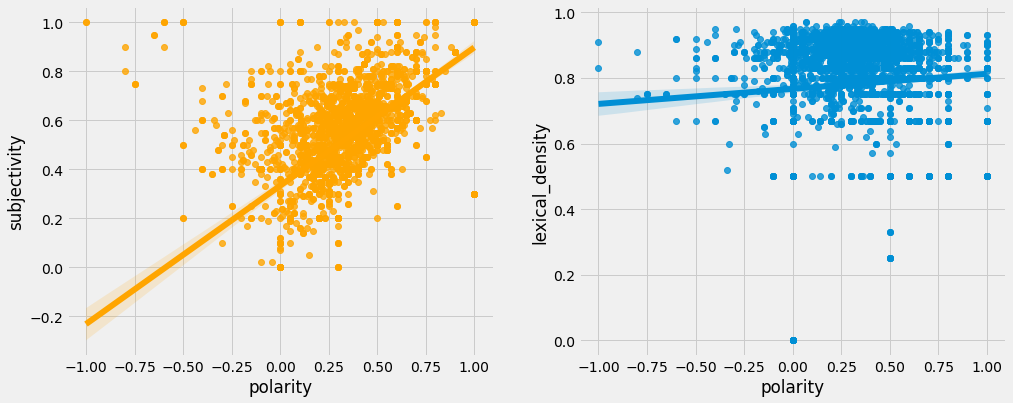

In [50]:
plt.rcParams["figure.figsize"]=(15,6)
plt.subplot(1,2,1)
sns.regplot(data["polarity"],data["subjectivity"],color="orange")
plt.subplot(1,2,2)
sns.regplot(data["polarity"],data["lexical_density"])
plt.show()

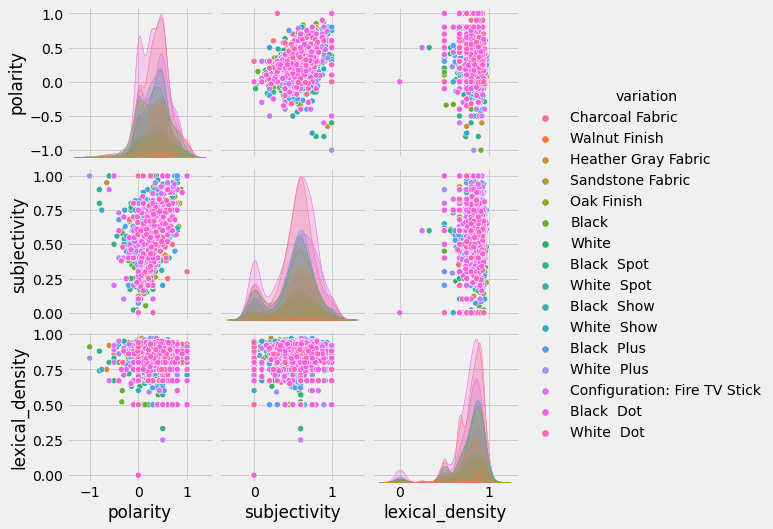

In [51]:
plt.rcParams["figure.figsize"]=(18,8)
sns.pairplot(data[["variation","polarity","subjectivity","lexical_density"]],hue="variation")
plt.show()

In [52]:
@interact
def get(words=sorted(data["review_words"].unique(),reverse=False)[1:]):
  return data[data["review_words"]==words][["variation","polarity","subjectivity","verified_reviews",
                                    "review_char"]].head(10).style.background_gradient(cmap="inferno")

interactive(children=(Dropdown(description='words', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…

In [53]:
data.groupby(["variation","feedback"]).agg({"polarity":"mean","subjectivity":"mean","lexical_density":"mean"}).reset_index().head(20).style.background_gradient(cmap="magma")

,variation,feedback,polarity,subjectivity,lexical_density
0,Black,0,-0.007143,0.325714,0.804000
1,Black,1,0.360177,0.514602,0.779602
2,Black Dot,0,0.001667,0.373889,0.754444
3,Black Dot,1,0.348875,0.526271,0.763500
4,Black Plus,0,0.113214,0.437500,0.798571
5,Black Plus,1,0.359711,0.543058,0.785413
6,Black Show,0,0.124444,0.338889,0.781111
7,Black Show,1,0.359231,0.509514,0.787085
8,Black Spot,0,-0.038750,0.362812,0.774375
9,Black Spot,1,0.360909,0.571053,0.796890


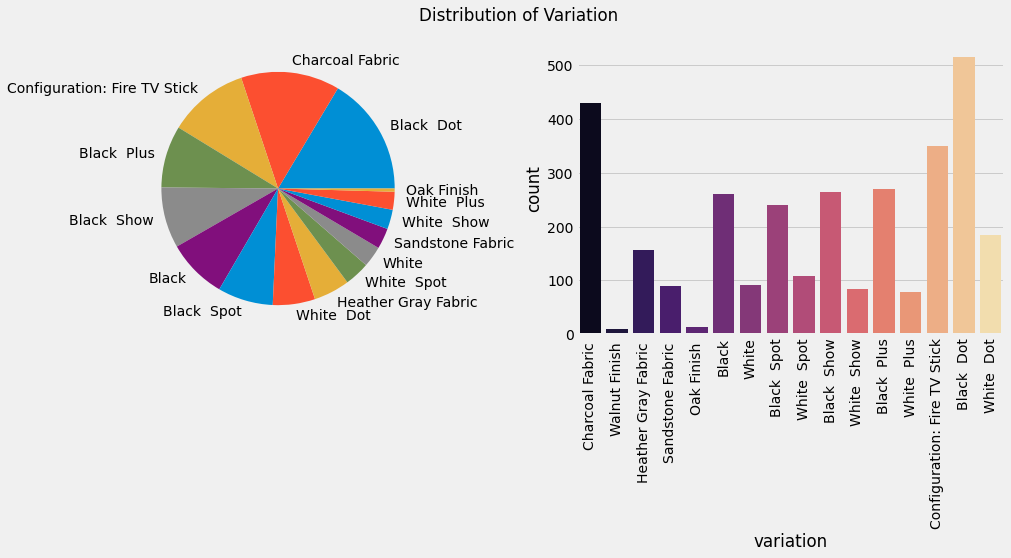

In [54]:
plt.rcParams["figure.figsize"]=(15,5)
plt.subplot(1,2,1)
plt.pie(data["variation"].value_counts().values[:-1],labels=data["variation"].value_counts().keys()[:-1])
plt.subplot(1,2,2)
sns.countplot(data["variation"],palette="magma")
plt.xticks(rotation="vertical")
plt.suptitle("Distribution of Variation")
plt.show()

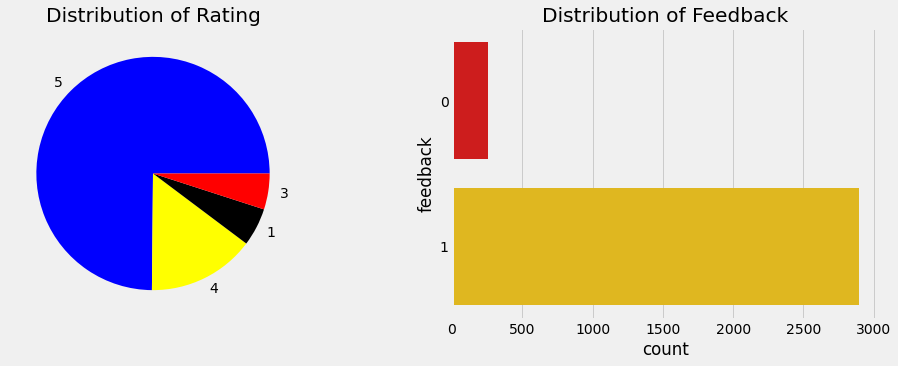

In [55]:
plt.rcParams["figure.figsize"]=(15,5)
plt.subplot(1,2,1)
plt.pie(data["rating"].value_counts().values[:-1],labels=data["rating"].value_counts().keys()[:-1],colors=["blue","yellow","black","red","yellow"])
plt.title("Distribution of Rating")
plt.subplot(1,2,2)
sns.countplot(y=data["feedback"],palette="hot",orient="v")
plt.title("Distribution of Feedback")
plt.show()

## Model Building

In [56]:
vectorizer=CountVectorizer(max_features=2500)
x=vectorizer.fit_transform(data["verified_reviews"]).toarray()
y=data.loc[:,"feedback"].values

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [58]:
@interact_manual
def Apply(Model=[GaussianNB(),BernoulliNB(),SVC()]):
  Model.fit(x_train,y_train)
  print(" ")
  return Model.score(x_test,y_test)

interactive(children=(Dropdown(description='Model', options=(GaussianNB(), BernoulliNB(), SVC()), value=Gaussi…

## More Functionality for Best Model Building

In [59]:
@interact_manual
def Apply(Model=[GaussianNB(),BernoulliNB(),SVC(),RandomForestClassifier(),GradientBoostingClassifier()],
           vectorizer=[CountVectorizer(max_features=2500),TfidfVectorizer(max_features=2500)]):
  x=vectorizer.fit_transform(data["verified_reviews"]).toarray()
  y=data.loc[:,"feedback"].values
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
  Model.fit(x_train,y_train)
  prediction=Model.predict(x_test)
  print(" ")
  return (print(f'The Accuracy is {Model.score(x_test,y_test)}'),
          print(" "),
          print(classification_report(y_test,prediction)),
          print(" "),
          plt.subplot(1,2,1),
          sns.countplot(pd.Series(y_test)),
          plt.title("Original"),
          plt.subplot(1,2,2),
          sns.countplot(pd.Series(prediction)),
          plt.title("Prediction"),
          plt.show()
  )

interactive(children=(Dropdown(description='Model', options=(GaussianNB(), BernoulliNB(), SVC(), RandomForestC…

## Seperate Model Building

In [60]:
vectorizer=CountVectorizer(max_features=2500)
x=vectorizer.fit_transform(data["verified_reviews"]).toarray()
y=data.loc[:,"feedback"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier()
Model.fit(x_train,y_train)
print(f'Training Accuracy : {Model.score(x_train,y_train)}')
print(f'Testing Accuracy : {Model.score(x_test,y_test)}')
print(classification_report(y_test,Model.predict(x_test)))

Training Accuracy : 0.9932539682539683
Testing Accuracy : 0.946031746031746
              precision    recall  f1-score   support

           0       0.95      0.37      0.53        52
           1       0.95      1.00      0.97       578

    accuracy                           0.95       630
   macro avg       0.95      0.68      0.75       630
weighted avg       0.95      0.95      0.93       630



## Gradient Boosting Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(x_train,y_train)
print(f'Training Accuracy : {Model.score(x_train,y_train)}')
print(f'Testing Accuracy : {Model.score(x_test,y_test)}')
print(classification_report(y_test,Model.predict(x_test)))

Training Accuracy : 0.957936507936508
Testing Accuracy : 0.9238095238095239
              precision    recall  f1-score   support

           0       0.64      0.17      0.27        52
           1       0.93      0.99      0.96       578

    accuracy                           0.92       630
   macro avg       0.79      0.58      0.62       630
weighted avg       0.91      0.92      0.90       630



## Results are poor because data is Imabalnce 

In [68]:
from imblearn.combine import SMOTEENN

In [69]:
pd.Series(y_train).value_counts(),pd.Series(y_test).value_counts()

(1    2315
 0     205
 dtype: int64, 1    578
 0     52
 dtype: int64)

In [71]:
vectorizer=CountVectorizer(max_features=2500)
x=vectorizer.fit_transform(data["verified_reviews"]).toarray()
y=data.loc[:,"feedback"].values
re_x,re_y=SMOTEENN().fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(re_x,re_y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3572, 2500), (893, 2500), (3572,), (893,))

In [72]:
pd.Series(y_train).value_counts(),pd.Series(y_test).value_counts()

(0    2233
 1    1339
 dtype: int64, 0    554
 1    339
 dtype: int64)

In [75]:
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier()
Model.fit(x_train,y_train)
print(f'Training Accuracy : {Model.score(x_train,y_train)}')
print(f'Testing Accuracy : {Model.score(x_test,y_test)}')
print(classification_report(y_test,Model.predict(x_test)))

Training Accuracy : 1.0
Testing Accuracy : 0.9876819708846585
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       554
           1       0.97      1.00      0.98       339

    accuracy                           0.99       893
   macro avg       0.98      0.99      0.99       893
weighted avg       0.99      0.99      0.99       893



In [76]:
import pickle
pickle.dump(Model,open('RandomForestClassifier.pkl','wb'))

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
Model=GradientBoostingClassifier()
Model.fit(x_train,y_train)
print(f'Training Accuracy : {Model.score(x_train,y_train)}')
print(f'Testing Accuracy : {Model.score(x_test,y_test)}')
print(classification_report(y_test,Model.predict(x_test)))

Training Accuracy : 0.9655655095184771
Testing Accuracy : 0.9440089585666294
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       554
           1       0.98      0.87      0.92       339

    accuracy                           0.94       893
   macro avg       0.95      0.93      0.94       893
weighted avg       0.95      0.94      0.94       893



## Report Generation

In [77]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 21.9 MB 829 kB/s
     |████████████████████████████████| 102 kB 6.3 MB/s 
     |████████████████████████████████| 690 kB 34.6 MB/s 
     |████████████████████████████████| 4.7 MB 33.7 MB/s 
     |████████████████████████████████| 62 kB 845 kB/s 
     |████████████████████████████████| 812 kB 30.9 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=cf1f584edb114f8537fd4ff980b4025be25449f537a3a205a3c7bc86c9986333
  Stored in directory: /tmp/pip-ephem-wheel-cache-ksw3unmk/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=66eb0dd19eae36c3258d123abc6e50fb2c10e4fd2537356e8c6c67f74eb0721e
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash

In [ ]:
import os
os._exit(00)

In [3]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport 

In [4]:
profile = ProfileReport(data, title="data set", html={'style' : {'full_width':True}})
profile.to_file(output_file="AmazonReviewsReport.html") 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]